In [1]:
import pandas as pd

In [2]:
titanic_data = pd.read_csv("Titanic_data.csv")

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Pclass', ylabel='SibSp'>

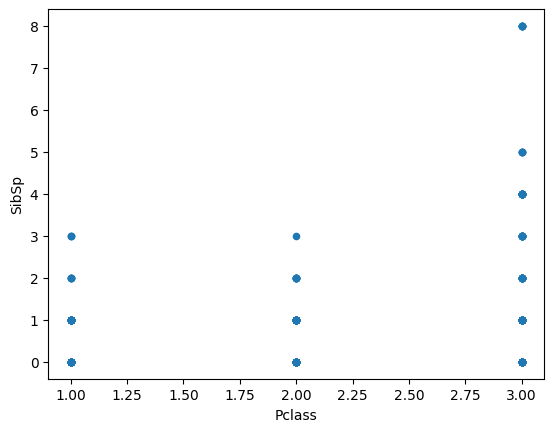

In [4]:
# data.plot.scatter('Age','Fare')
titanic_data.plot.scatter('Pclass','SibSp')

In [5]:
titanic_data[['Pclass','SibSp']].corr()

,Pclass,SibSp
Pclass,1.000000,0.083081
SibSp,0.083081,1.000000


## Chi-Square Test

The chi-square test is a statistical test used to determine whether there is a significant association between categorical variables. It compares the observed frequencies of categories in a dataset to the expected frequencies under a specific hypothesis.

The test statistic for the chi-square test is calculated using the formula:

\begin{equation}
\chi^2 = \sum{\frac{{(O_i - E_i)^2}}{{E_i}}}
\end{equation}

where:
- $\chi^2$ is the chi-square test statistic
- $O_i$ is the observed frequency for each category
- $E_i$ is the expected frequency for each category, which is determined based on the null hypothesis


The null hypothesis for the chi-square test is that there is no association between the categorical variables, meaning the observed frequencies match the expected frequencies.

The chi-square test statistic follows a chi-square distribution with degrees of freedom determined by the number of categories and the constraints imposed by the null hypothesis.

In [6]:
import scipy.stats as stats

In [7]:
data = pd.DataFrame(
    {'Category': ['A', 'B' , 'C','A','B','C','B'],
     'Outcome' : ['true','false','true','false','true','true','true']}
)
data.head()

,Category,Outcome
0,A,true
1,B,false
2,C,true
3,A,false
4,B,true


In [8]:
contingency_table = pd.crosstab(data.Category, data.Outcome)

In [9]:
chi2_score, p_value, dof, expected = stats.chi2_contingency(contingency_table)

In [10]:
print(f"Chi-square test score = {chi2_score :.5f}")
print(f"p-value = {p_value :.5f}")
print(f"Excepted Frequencies")
print(expected)

Chi-square test score = 1.28333
p-value = 0.52641
Excepted Frequencies
[[0.57142857 1.42857143]
 [0.85714286 2.14285714]
 [0.57142857 1.42857143]]


**Interpreting the results**

- The chi-square test statistic measures the difference between the observed and expected frequencies. A larger test statistic indicates a larger deviation from the expected frequencies.
- The p-value represents the probability of observing a test statistic as extreme as the one calculated, assuming the null hypothesis is true. A small p-value (typically below a significance level such as 0.05) suggests rejecting the null hypothesis in favor of the alternative hypothesis.
- The expected frequencies are the frequencies that would be expected under the null hypothesis. Comparing the observed frequencies to the expected frequencies provides insights into the association between the categorical variables.

In [12]:
chi2_score, p_value, dof, expected = stats.chi2_contingency(
    pd.crosstab(titanic_data.Pclass, titanic_data.SibSp)
)
print(f"Chi-square test score = {chi2_score :.5f}")
print(f"p-value = {p_value :.5f}")

Chi-square test score = 50.86189
p-value = 0.00000
